In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

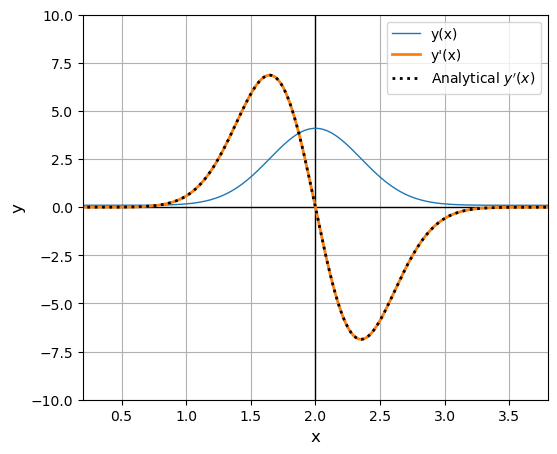

In [11]:
fig, ax = plt.subplots(figsize=(6,5))
ax.grid()
ax.set_xlim([0.2, 3.8])
ax.set_ylim([-10.0,10.0])

ax.set_xlabel("x", fontsize=12)
ax.set_ylabel("y", fontsize=12)

ax.hlines(0.0, -5.0, 5.0, colors="k", lw=1)
ax.vlines(2.0, -10.0, 10.0, colors="k", lw=1)


def gauss(xs, A=4.0, x0=2.0, sigm=0.5, c=0.1):
    return A*torch.exp(-((xs-x0)/sigm)**2)+c #In order to pass things through torch they have to be in terms of "torch functions", like np.exp,np.cos,np.sin .. they have torch.exp,.sin,.cos....

def gaussp(xs, A=4.0, x0=2.0, sigm=0.5, c=0.0):
    return gauss(xs=xs, c=c)*(-2.0*(xs-x0)/sigm**2)

xs = torch.linspace(-2.0,4.0, 300, requires_grad=True)
ys = gauss(xs=xs)
ysp = torch.autograd.grad(ys,xs,torch.ones_like(ys))[0] 
with torch.no_grad():
    ax.plot(xs, ys, label=r"y(x)", lw=1)
    ax.plot(xs, ysp,label=r"y'(x)", lw=2)
    ax.plot(xs, gaussp(xs), ':', lw=2, c="k", label=r"Analytical $y'(x)$")

ax.legend()

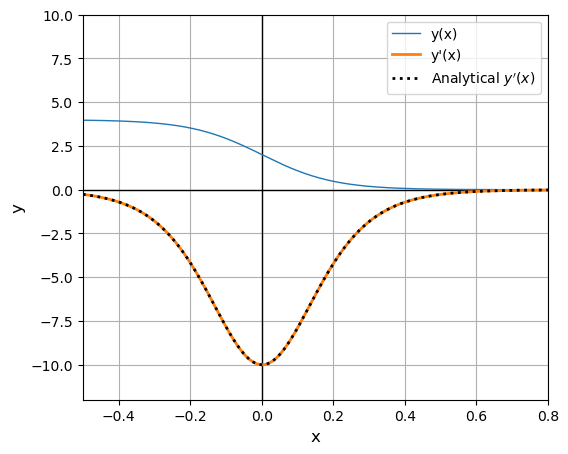

In [16]:
fig, ax = plt.subplots(figsize=(6,5))
ax.grid()
ax.set_xlim([-0.5, 0.8])
ax.set_ylim([-12.0,10.0])

ax.set_xlabel("x", fontsize=12)
ax.set_ylabel("y", fontsize=12)

ax.hlines(0.0, -5.0, 5.0, colors="k", lw=1)
ax.vlines(0.0, -12.0, 10.0, colors="k", lw=1)

def fermi_dir(energies, mu=1e-3, kbT=0.1, A=4.0, c=0.0):
    return 1.0/(torch.exp((energies-mu)/kbT)+1.0)*A + c

def fermi_dirp(energies, mu=1e-3, kbT=0.1, A=4.0, c=0.0):
    return -fermi_dir(energies=energies, A=1.0, c=0.0)**2*torch.exp((energies-mu)/kbT)/kbT*A

xs = torch.linspace(-0.5,1.0, 300, requires_grad=True)
ys = fermi_dir(energies=xs)
ysp = torch.autograd.grad(ys,xs,torch.ones_like(ys))[0]

with torch.no_grad():
    ax.plot(xs, ys, label=r"y(x)", lw=1)
    ax.plot(xs, ysp,label=r"y'(x)", lw=2)
    ax.plot(xs, fermi_dirp(xs), ':',lw=2,c="k", label=r"Analytical $y'(x)$")

ax.legend()